## Import Libs

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import xgboost
import pickle as pkl
from sklearn.model_selection import cross_val_score, GridSearchCV
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings ("ignore")


# 1. DATA OVERVIEW

### Load Data

In [5]:
data = pd.read_csv('Diabetes.csv')
data.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,Sex,Age,Income,Diabetes_binary
0,0,1,0,1,26,0,0,0,1,0,1,0,3,5,1,4,8,0
1,0,1,1,1,26,1,1,0,0,0,1,0,3,0,1,12,8,0
2,0,0,0,1,26,0,0,0,1,0,1,0,1,0,1,13,8,0
3,0,1,1,1,28,1,0,0,1,0,1,0,3,0,1,11,8,0
4,0,0,0,1,29,1,0,0,1,0,1,0,2,0,0,8,8,0


### Get the dimensions of the DataFrame

In [7]:
print("\nShape of the dataset:", data.shape)


Shape of the dataset: (250000, 18)


### Data Information

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Diabetes_012          250000 non-null  int64
 1   HighBP                250000 non-null  int64
 2   HighChol              250000 non-null  int64
 3   CholCheck             250000 non-null  int64
 4   BMI                   250000 non-null  int64
 5   Smoker                250000 non-null  int64
 6   Stroke                250000 non-null  int64
 7   HeartDiseaseorAttack  250000 non-null  int64
 8   PhysActivity          250000 non-null  int64
 9   HvyAlcoholConsump     250000 non-null  int64
 10  AnyHealthcare         250000 non-null  int64
 11  NoDocbcCost           250000 non-null  int64
 12  GenHlth               250000 non-null  int64
 13  MentHlth              250000 non-null  int64
 14  Sex                   250000 non-null  int64
 15  Age                   250000 non-n

### Columns

In [11]:
data.columns

Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'HvyAlcoholConsump',
       'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'Sex', 'Age',
       'Income', 'Diabetes_binary'],
      dtype='object')

In [12]:
data = data.rename(columns ={'Diabetes_012':'Diabetes_possibility',
                      'NoDocbcCost':'Doctor_Visit',
                      'Diabetes_binary':'Diabetes_Presence(Target)',
                      'AnyHealthcare':'Healthcare_Access'}
           )
data

,Diabetes_possibility,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,Healthcare_Access,Doctor_Visit,GenHlth,MentHlth,Sex,Age,Income,Diabetes_Presence(Target)
0,0,1,0,1,26,0,0,0,1,0,1,0,3,5,1,4,8,0
1,0,1,1,1,26,1,1,0,0,0,1,0,3,0,1,12,8,0
2,0,0,0,1,26,0,0,0,1,0,1,0,1,0,1,13,8,0
3,0,1,1,1,28,1,0,0,1,0,1,0,3,0,1,11,8,0
4,0,0,0,1,29,1,0,0,1,0,1,0,2,0,0,8,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0,1,0,1,21,0,0,0,1,0,1,0,2,0,0,9,6,0
249996,0,0,1,1,29,0,0,0,1,0,1,0,5,0,0,10,1,0
249997,0,1,0,1,28,1,0,1,1,0,1,0,2,2,0,9,8,0
249998,0,1,1,1,32,0,0,0,0,0,1,0,3,0,1,8,7,1


# 2. DESCRIPTIVE STATISTICS

In [14]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Diabetes_possibility,250000.0,0.293928,0.695322,0.0,0.0,0.0,0.0,2.0
HighBP,250000.0,0.465848,0.498833,0.0,0.0,0.0,1.0,1.0
HighChol,250000.0,0.452744,0.497763,0.0,0.0,0.0,1.0,1.0
CholCheck,250000.0,0.966560,0.179783,0.0,1.0,1.0,1.0,1.0
BMI,250000.0,28.808652,6.903600,12.0,24.0,27.0,32.0,98.0
Smoker,250000.0,0.456468,0.498102,0.0,0.0,0.0,1.0,1.0
Stroke,250000.0,0.046616,0.210815,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,250000.0,0.108920,0.311539,0.0,0.0,0.0,0.0,1.0
PhysActivity,250000.0,0.741364,0.437886,0.0,0.0,1.0,1.0,1.0
HvyAlcoholConsump,250000.0,0.052632,0.223298,0.0,0.0,0.0,0.0,1.0


## Checking Columns for Irrelevancy

In [16]:
data["GenHlth"].value_counts()

GenHlth
2    83405
3    76701
1    40571
4    35065
5    14258
Name: count, dtype: int64

In [17]:
data["Income"].value_counts()

Income
8    85895
7    41938
6    35880
5    26167
4    20869
3    16631
2    12683
1     9937
Name: count, dtype: int64

In [18]:
data["MentHlth"].value_counts()

MentHlth
0     172229
30     12651
2      12636
5       8916
1       8173
3       7215
10      6503
15      5596
4       3660
20      3490
7       2983
25      1290
14      1160
6       1000
8        636
12       415
28       331
21       241
29       173
18       111
9         92
16        91
27        70
22        66
17        51
13        46
23        45
26        41
11        36
24        34
19        19
Name: count, dtype: int64

In [19]:
data["Doctor_Visit"].value_counts()

Doctor_Visit
0    228654
1     21346
Name: count, dtype: int64

## Checking Null values

In [21]:
data.isnull().sum()

Diabetes_possibility         0
HighBP                       0
HighChol                     0
CholCheck                    0
BMI                          0
Smoker                       0
Stroke                       0
HeartDiseaseorAttack         0
PhysActivity                 0
HvyAlcoholConsump            0
Healthcare_Access            0
Doctor_Visit                 0
GenHlth                      0
MentHlth                     0
Sex                          0
Age                          0
Income                       0
Diabetes_Presence(Target)    0
dtype: int64

In [22]:
data.isnull().any()

Diabetes_possibility         False
HighBP                       False
HighChol                     False
CholCheck                    False
BMI                          False
Smoker                       False
Stroke                       False
HeartDiseaseorAttack         False
PhysActivity                 False
HvyAlcoholConsump            False
Healthcare_Access            False
Doctor_Visit                 False
GenHlth                      False
MentHlth                     False
Sex                          False
Age                          False
Income                       False
Diabetes_Presence(Target)    False
dtype: bool

## There are no null values from the looks of it

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   Diabetes_possibility       250000 non-null  int64
 1   HighBP                     250000 non-null  int64
 2   HighChol                   250000 non-null  int64
 3   CholCheck                  250000 non-null  int64
 4   BMI                        250000 non-null  int64
 5   Smoker                     250000 non-null  int64
 6   Stroke                     250000 non-null  int64
 7   HeartDiseaseorAttack       250000 non-null  int64
 8   PhysActivity               250000 non-null  int64
 9   HvyAlcoholConsump          250000 non-null  int64
 10  Healthcare_Access          250000 non-null  int64
 11  Doctor_Visit               250000 non-null  int64
 12  GenHlth                    250000 non-null  int64
 13  MentHlth                   250000 non-null  int64
 14  Sex 

In [25]:
data["Diabetes_Presence(Target)"].value_counts()

Diabetes_Presence(Target)
0    189946
1     60054
Name: count, dtype: int64

# 3. UNIVARIATE ANALYSIS - Exploratory Data Analysis

### Histograms for numerical variables

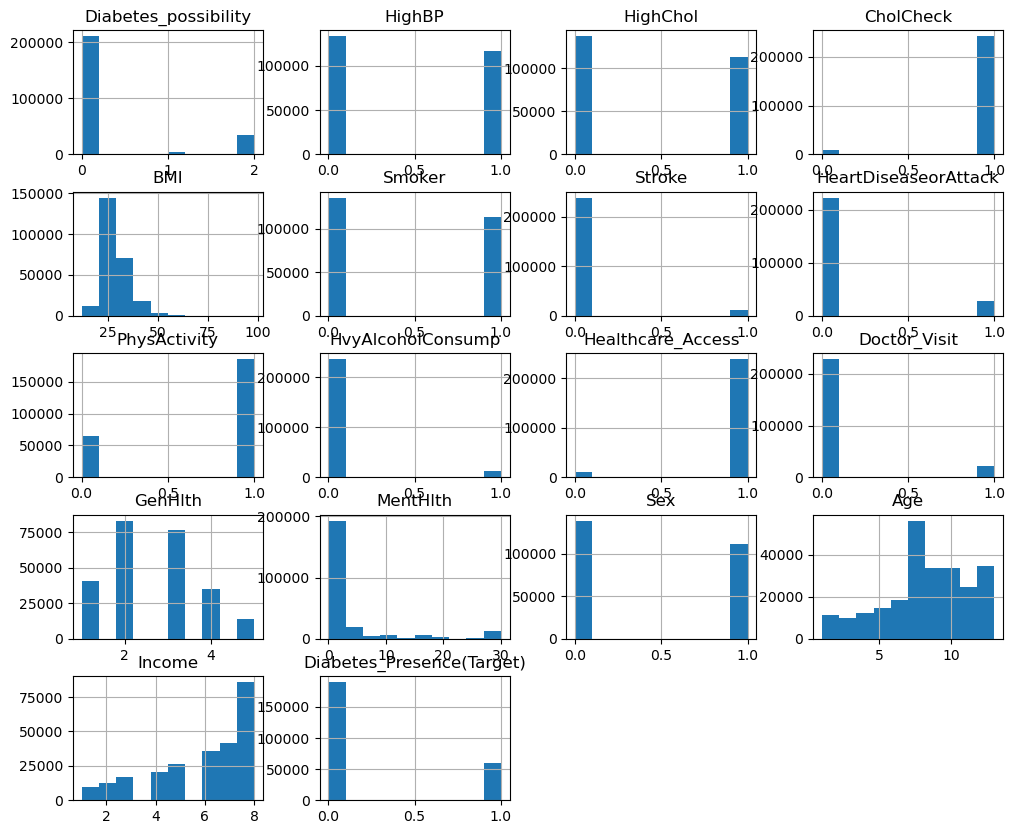

In [28]:
data.hist(figsize=(12, 10))
plt.show()

### Pie charts

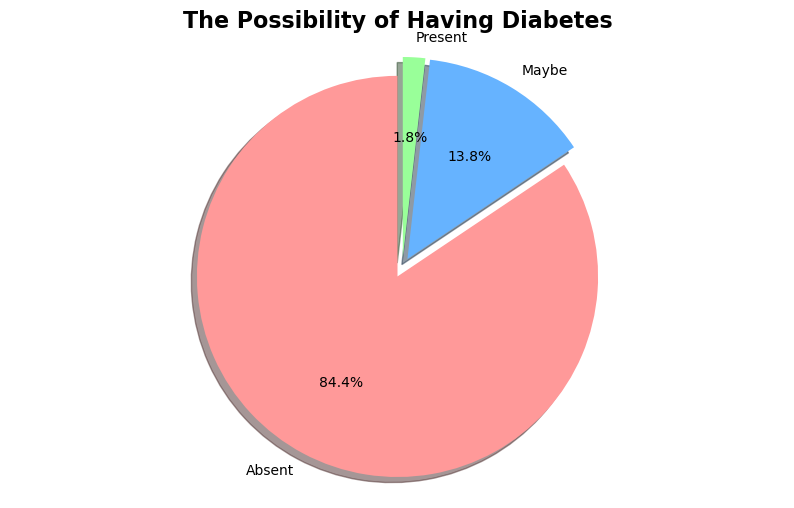

In [30]:
value = data['Diabetes_possibility'].value_counts()

colors = ['#ff9999','#66b3ff','#99ff99']

custom_labels = ['Absent', 'Maybe', 'Present']

plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.pie(
    value, 
    labels=custom_labels,       
    autopct='%1.1f%%',          
    startangle=90,              
    colors=colors,              
    shadow=True,                
    explode=(0.05, 0.05, 0.05)  
)

plt.title('The Possibility of Having Diabetes', fontsize=16, fontweight='bold')

plt.axis('equal')

plt.show()


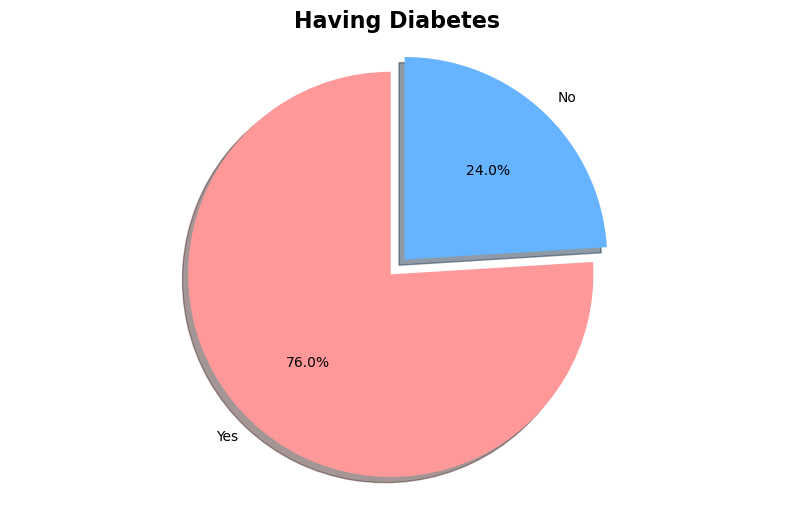

In [31]:
value = data['Diabetes_Presence(Target)'].value_counts()

colors = ['#ff9999','#66b3ff','#99ff99']

custom_labels = ['Yes', 'No']

plt.figure(figsize=(10, 6))  # Adjust the figure size
plt.pie(
    value, 
    labels=custom_labels,       
    autopct='%1.1f%%',          
    startangle=90,              
    colors=colors,              
    shadow=True,                
    explode=(0.05, 0.05)  
)

plt.title('Having Diabetes', fontsize=16, fontweight='bold')

plt.axis('equal')

plt.show()


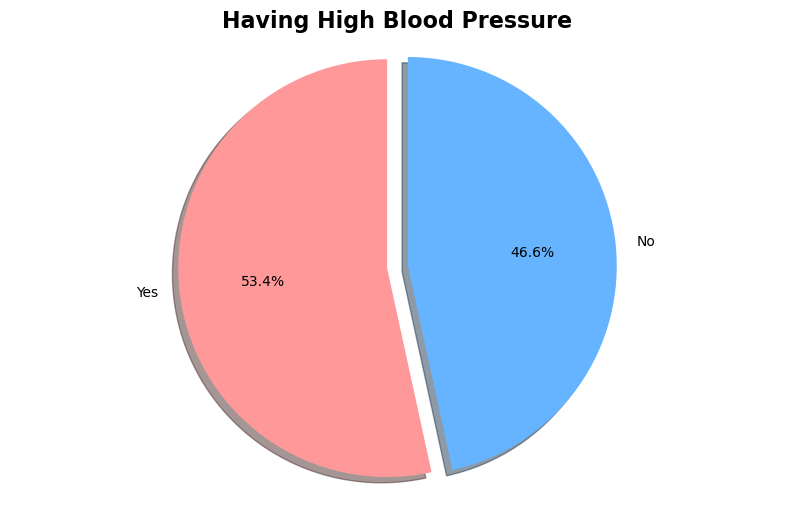

In [32]:
value = data['HighBP'].value_counts()

colors = ['#ff9999','#66b3ff','#99ff99']

custom_labels = ['Yes', 'No']

plt.figure(figsize=(10, 6))  
plt.pie(
    value, 
    labels=custom_labels,       
    autopct='%1.1f%%',          
    startangle=90,            
    colors=colors,              
    shadow=True,                
    explode=(0.05, 0.05)  
)

plt.title('Having High Blood Pressure', fontsize=16, fontweight='bold')

plt.axis('equal')

plt.show()


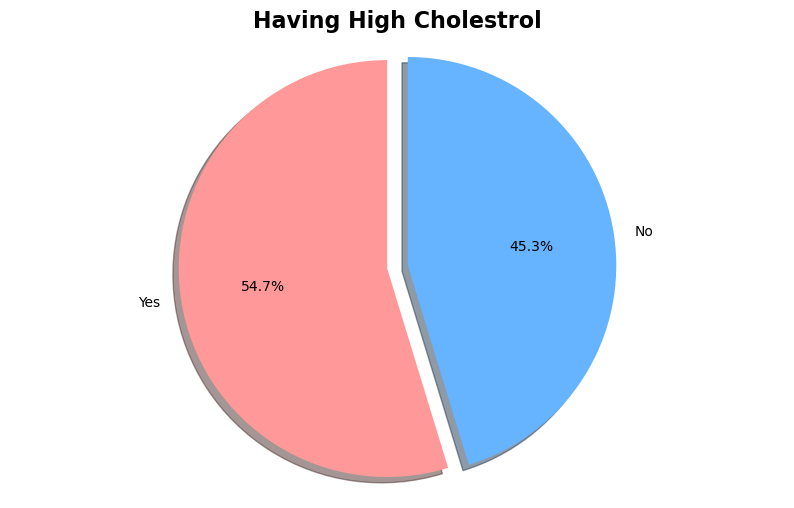

In [33]:
value = data['HighChol'].value_counts()

colors = ['#ff9999','#66b3ff','#99ff99']

custom_labels = ['Yes', 'No']

plt.figure(figsize=(10, 6))  
plt.pie(
    value, 
    labels=custom_labels,       
    autopct='%1.1f%%',          
    startangle=90,           
    colors=colors,              
    shadow=True,                
    explode=(0.05, 0.05)  
)

plt.title('Having High Cholestrol', fontsize=16, fontweight='bold')

plt.axis('equal')

plt.show()


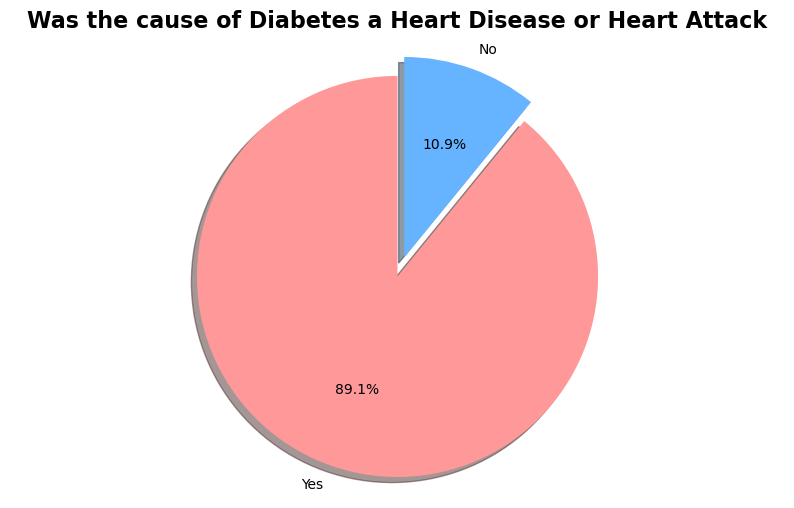

In [34]:
value = data['HeartDiseaseorAttack'].value_counts()

colors = ['#ff9999','#66b3ff','#99ff99']

custom_labels = ['Yes', 'No']

plt.figure(figsize=(10, 6))  
plt.pie(
    value, 
    labels=custom_labels,       
    autopct='%1.1f%%',          
    startangle=90,            
    colors=colors,              
    shadow=True,                
    explode=(0.05, 0.05)  
)

plt.title('Was the cause of Diabetes a Heart Disease or Heart Attack', fontsize=16, fontweight='bold')

plt.axis('equal')

plt.show()


### ---

<Axes: xlabel='Healthcare_Access', ylabel='count'>

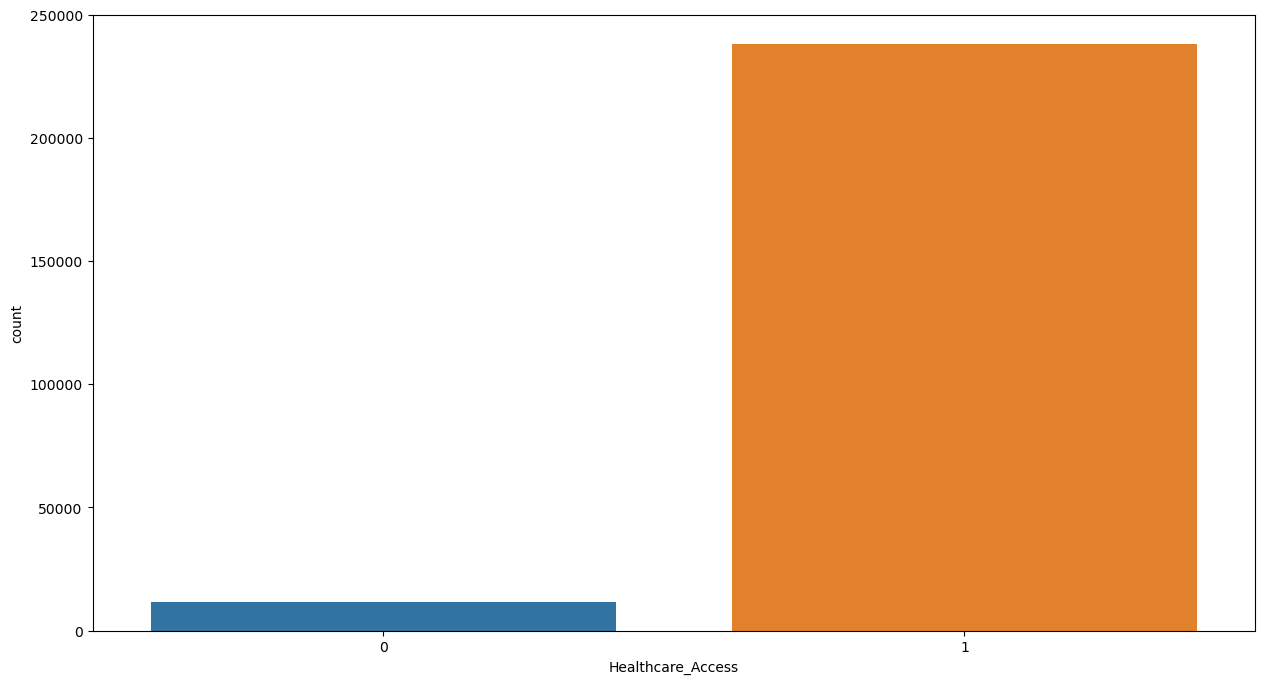

In [36]:
plt.figure(figsize = (15,8))
sns.countplot(x = data['Healthcare_Access'])

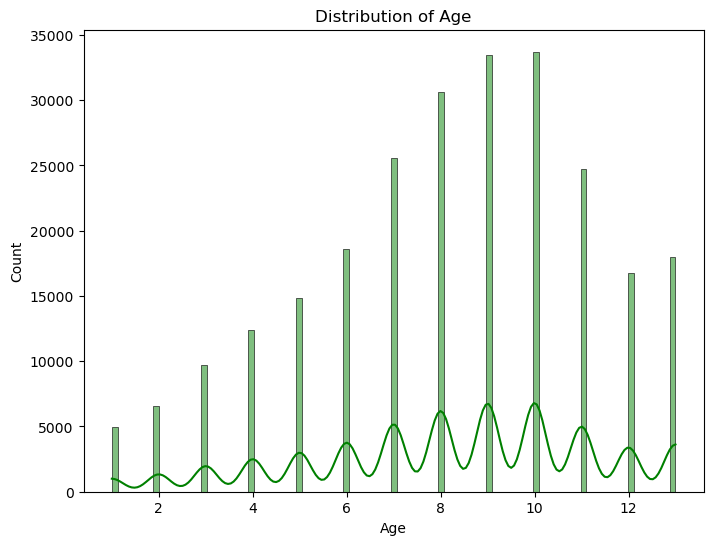

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], kde=True, color='green')
plt.title('Distribution of Age')
plt.show()

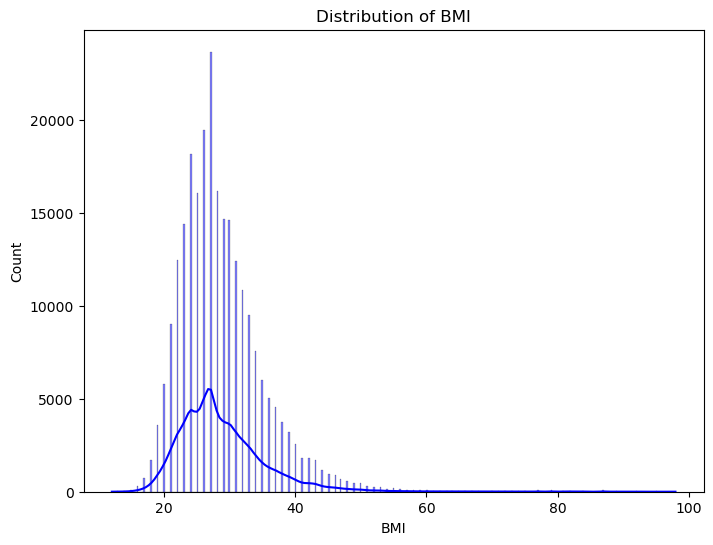

In [38]:
plt.figure(figsize=(8, 6))
sns.histplot(data['BMI'], kde=True, color='blue')
plt.title('Distribution of BMI')
plt.show()


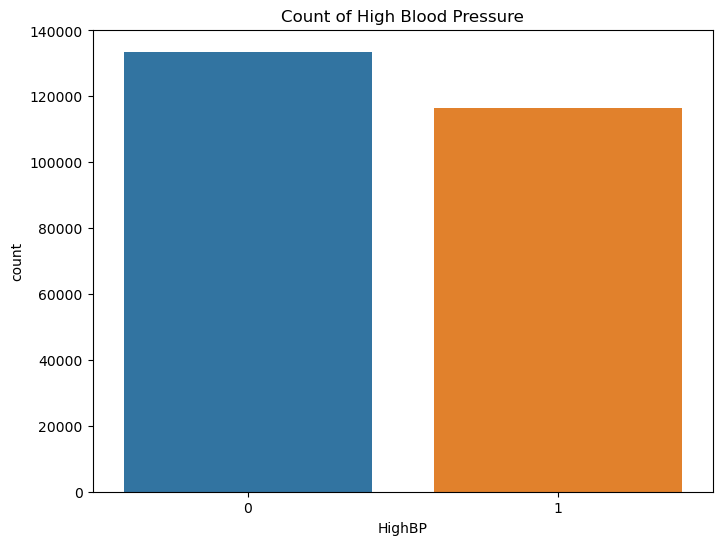

In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(x='HighBP', data=data)
plt.title('Count of High Blood Pressure')
plt.show()

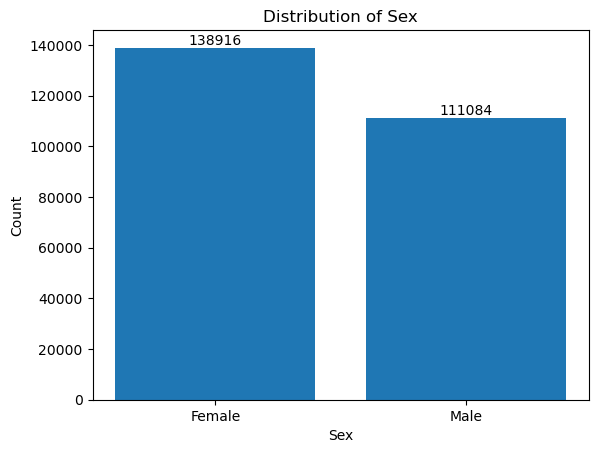

In [40]:
# Get the counts for each unique value in 'Sex'
y_axis = data['Sex'].value_counts()
x_axis = y_axis.index

# Create the bar plot
bars = plt.bar(x_axis, y_axis)

# Add labels to each bar
plt.bar_label(bars)

# Convert x-axis labels to strings if needed (e.g., 1 = Male, 0 = Female)
plt.xticks(ticks=x_axis, labels=['Male' if i == 1 else 'Female' for i in x_axis])

# Add axis labels and a title
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')

# Show the plot
plt.show()


# 4. BIVARIATE ANALYSIS - Exploratory Data Analysis

### Scatter plots for numerical variables

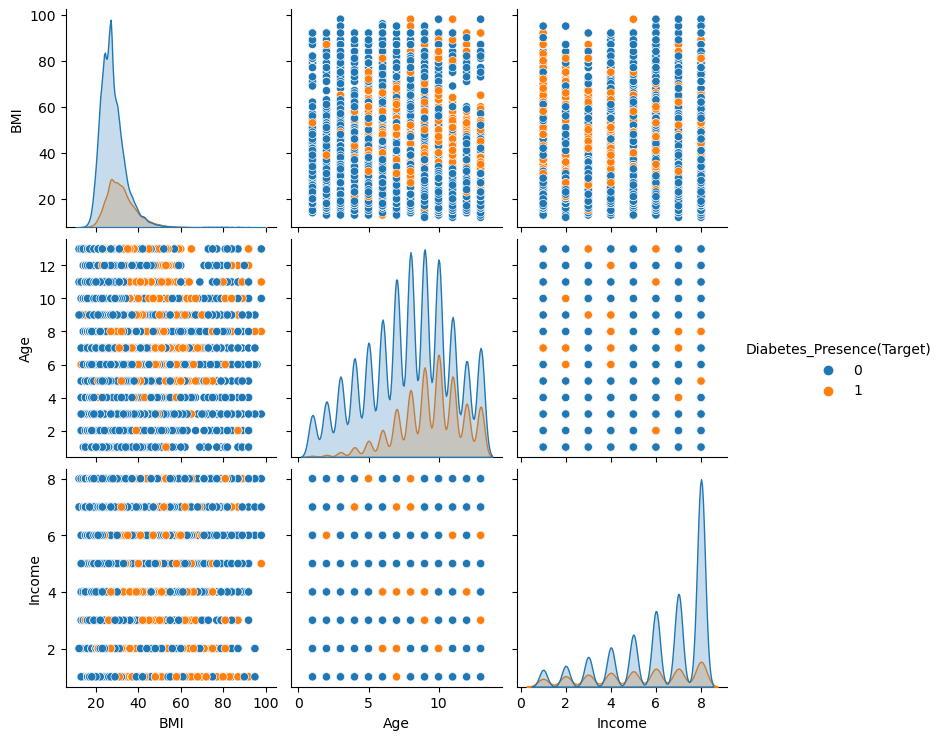

In [43]:
sns.pairplot(data, hue='Diabetes_Presence(Target)', vars=['BMI', 'Age', 'Income'])
plt.show()

### Box plots

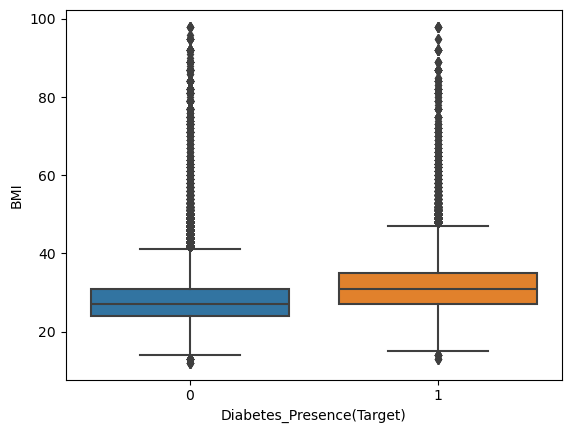

In [45]:
sns.boxplot(x='Diabetes_Presence(Target)', y='BMI', data=data)
plt.show()

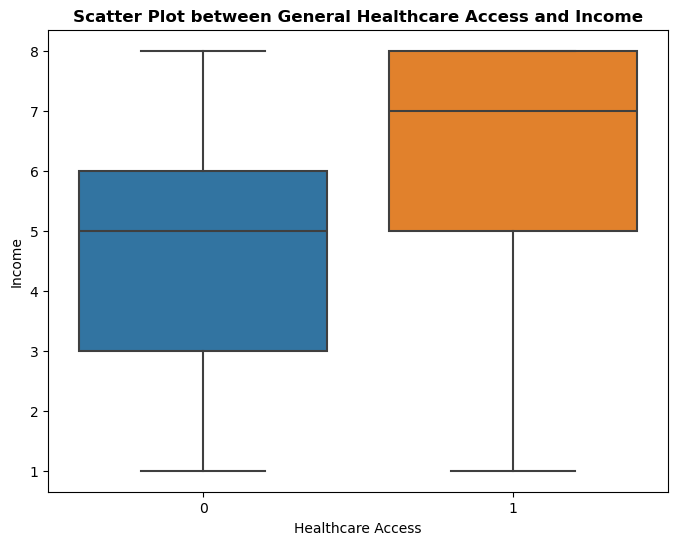

In [46]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Healthcare_Access', y='Income', data=data)
plt.title('Scatter Plot between General Healthcare Access and Income', fontsize=12, fontweight='bold')
plt.xlabel('Healthcare Access', fontsize=10)
plt.ylabel('Income', fontsize=10)
plt.show()

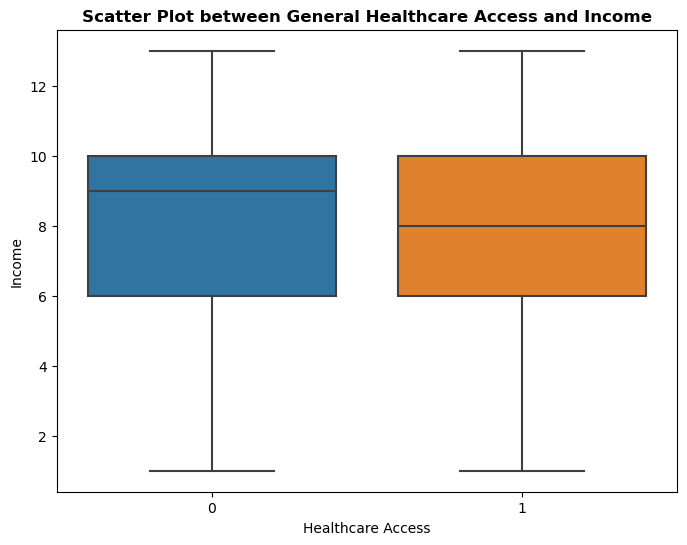

In [47]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='HvyAlcoholConsump', y='Age', data=data)
plt.title('Scatter Plot between General Healthcare Access and Income', fontsize=12, fontweight='bold')
plt.xlabel('Healthcare Access', fontsize=10)
plt.ylabel('Income', fontsize=10)
plt.show()

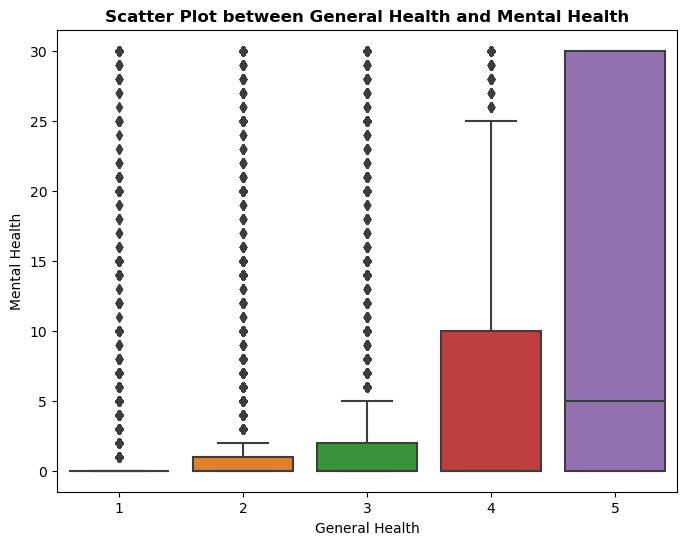

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='GenHlth', y='MentHlth', data=data)
plt.title('Scatter Plot between General Health and Mental Health', fontsize=12, fontweight='bold')
plt.xlabel('General Health', fontsize=10)
plt.ylabel('Mental Health', fontsize=10)
plt.show()

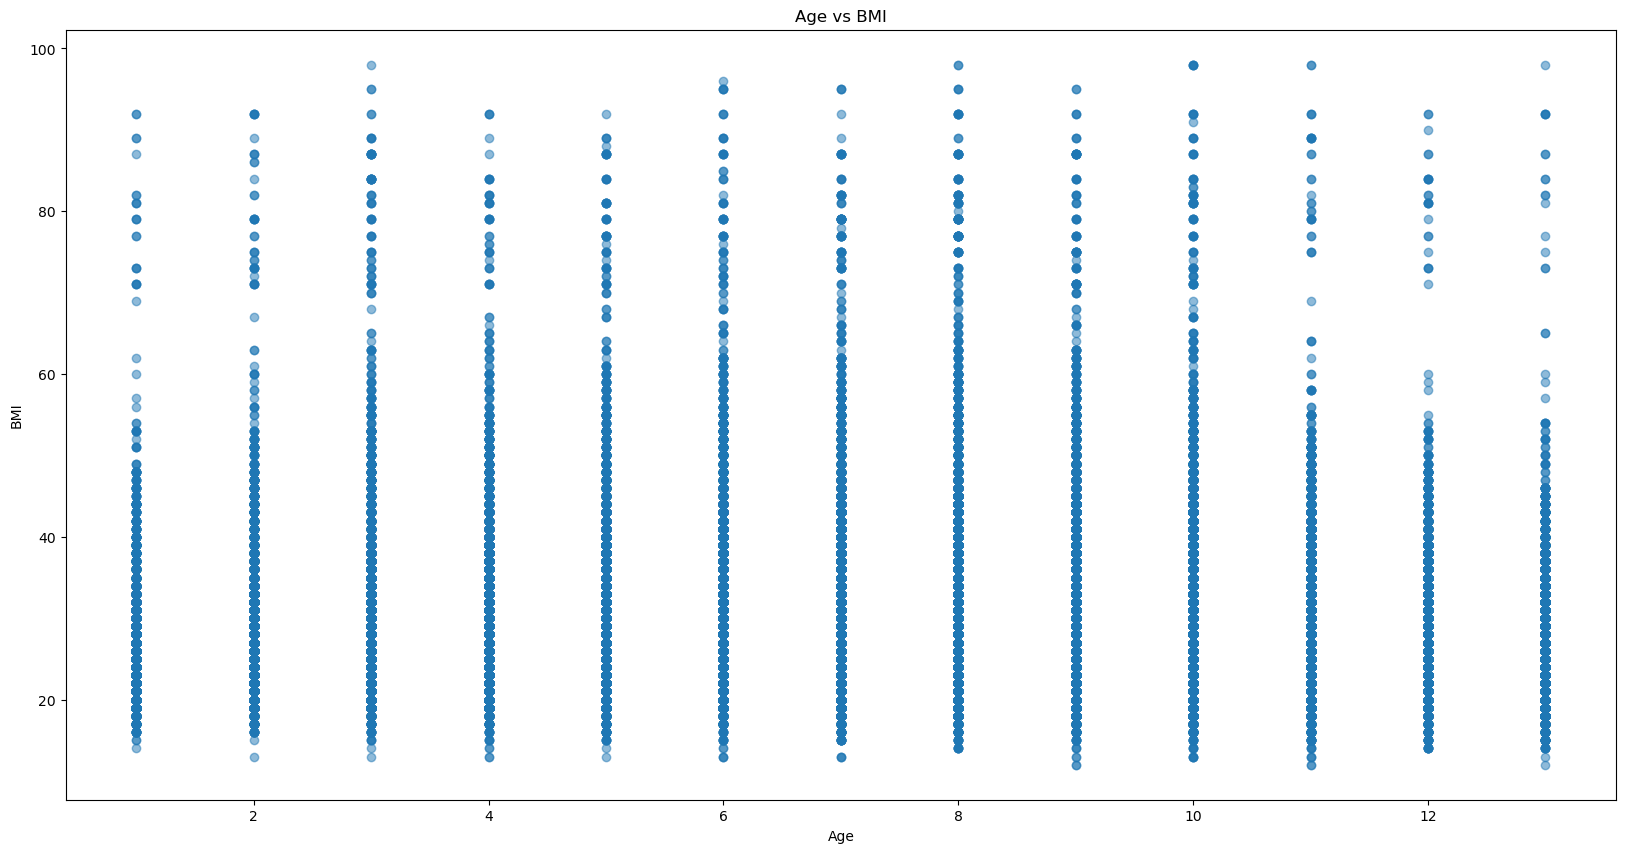

In [49]:
plt.figure(figsize=(20, 10))
plt.scatter(data['Age'], data['BMI'], alpha=0.5)
plt.title('Age vs BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

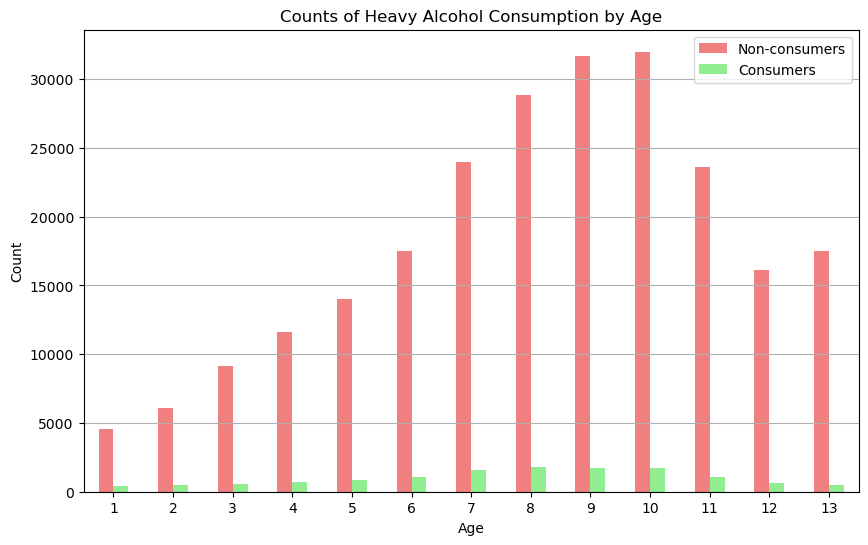

In [50]:
age_counts = data.groupby(['Age', 'HvyAlcoholConsump']).size().unstack(fill_value=0)
age_counts.plot(kind='bar', stacked=False, color=['lightcoral', 'lightgreen'], figsize=(10, 6))
plt.title('Counts of Heavy Alcohol Consumption by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['Non-consumers', 'Consumers'])
plt.grid(axis='y')
plt.show()

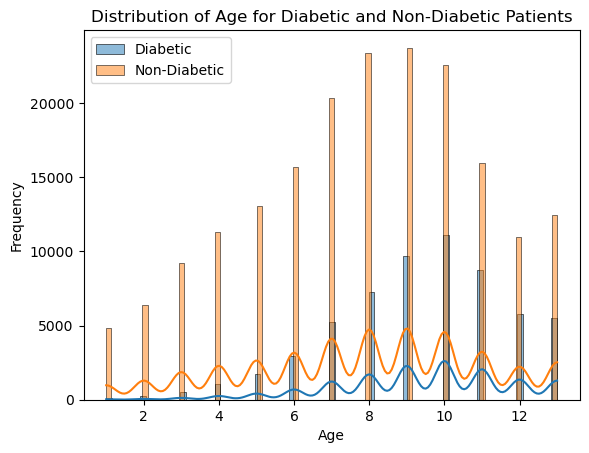

In [51]:
# Distribution of age for diabetic and non-diabetic patients
sns.histplot(data[data['Diabetes_Presence(Target)'] == 1]['Age'], label='Diabetic', kde=True)
sns.histplot(data[data['Diabetes_Presence(Target)'] == 0]['Age'], label='Non-Diabetic', kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age for Diabetic and Non-Diabetic Patients')
plt.legend()
plt.show()

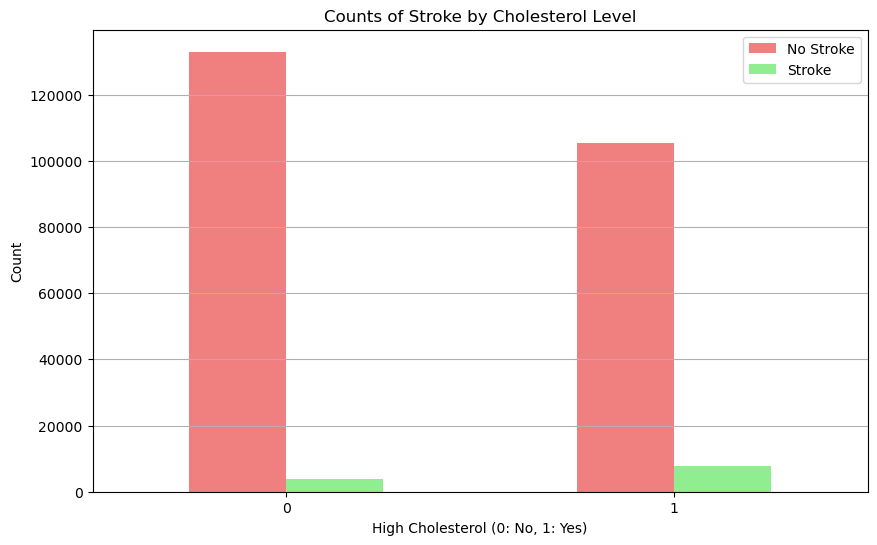

In [52]:
count_data = data.groupby(['HighChol', 'Stroke']).size().unstack(fill_value=0)
count_data.plot(kind='bar', color=['lightcoral', 'lightgreen'], figsize=(10, 6))
plt.title('Counts of Stroke by Cholesterol Level')
plt.xlabel('High Cholesterol (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['No Stroke', 'Stroke'])
plt.grid(axis='y')
plt.show()


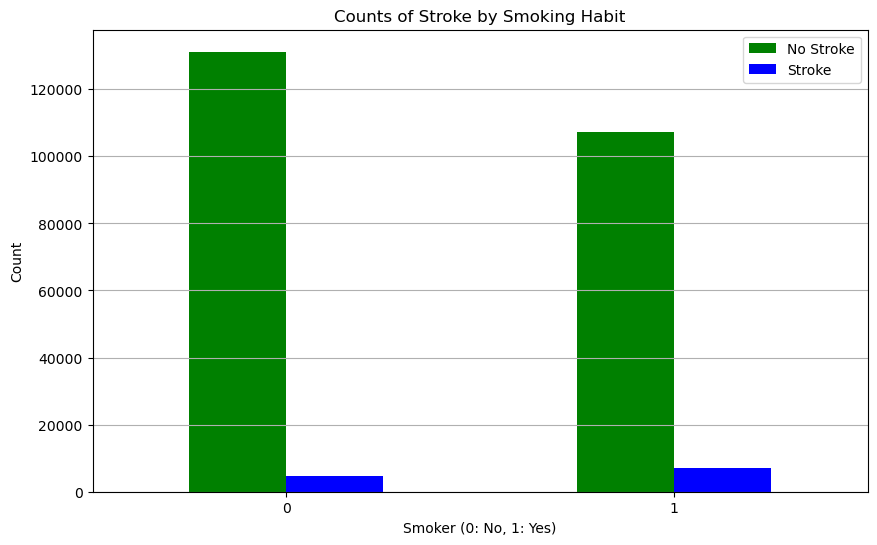

In [53]:
count_data = data.groupby(['Smoker', 'Stroke']).size().unstack(fill_value=0)
count_data.plot(kind='bar', color=['green', 'blue'], figsize=(10, 6))
plt.title('Counts of Stroke by Smoking Habit')
plt.xlabel('Smoker (0: No, 1: Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(['No Stroke', 'Stroke'])
plt.grid(axis='y')
plt.show()


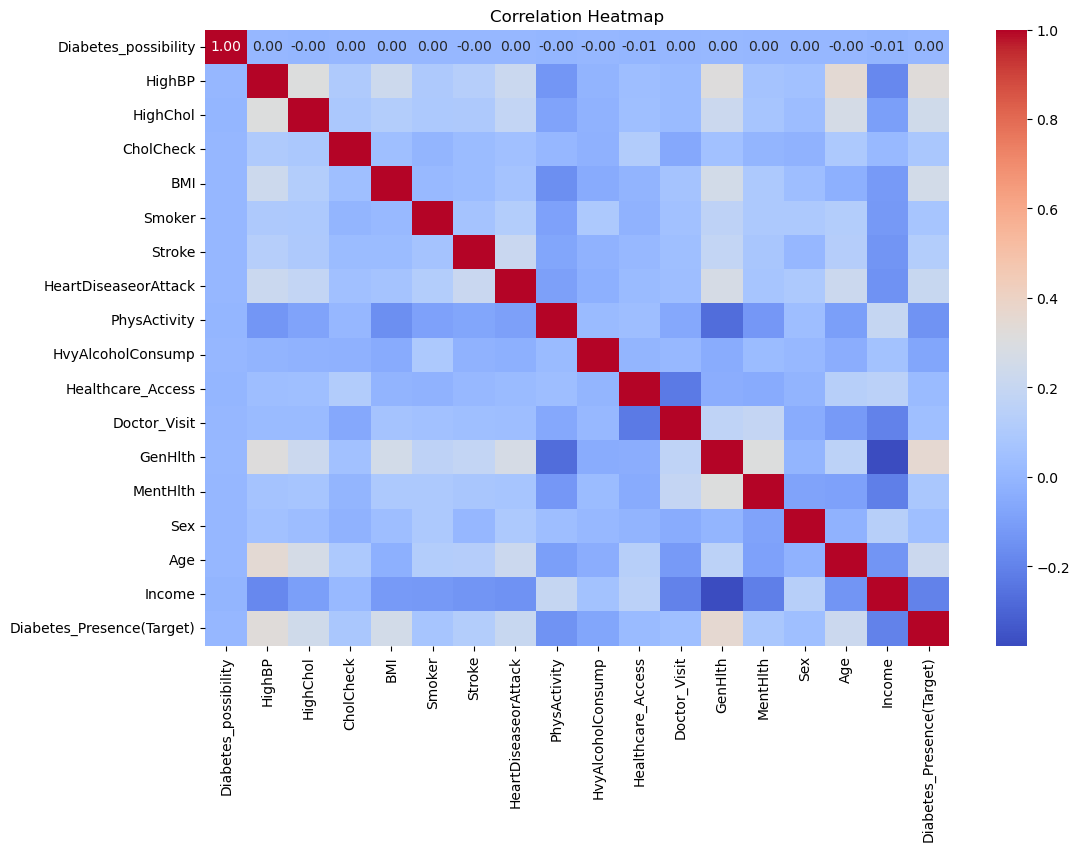

In [54]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

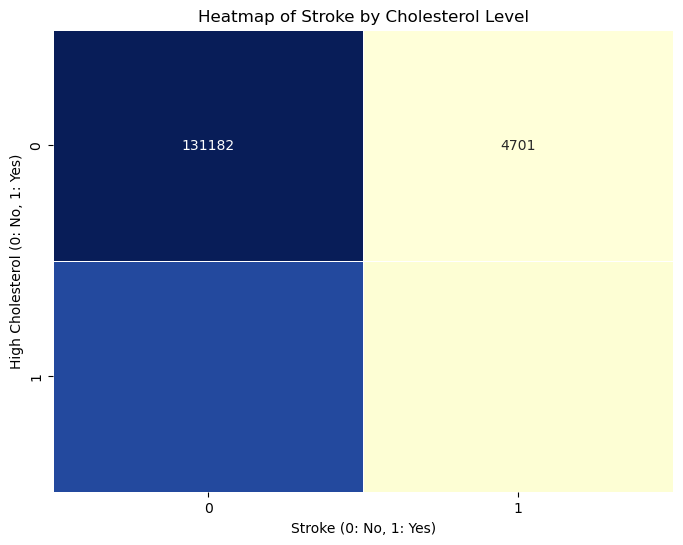

In [55]:
plt.figure(figsize=(8, 6))
sns.heatmap(count_data, annot=True, fmt='d', cmap='YlGnBu', cbar=False, linewidths=.5)
plt.title('Heatmap of Stroke by Cholesterol Level')
plt.xlabel('Stroke (0: No, 1: Yes)')
plt.ylabel('High Cholesterol (0: No, 1: Yes)')
plt.show()

# 5. OUTLIER DETECTION

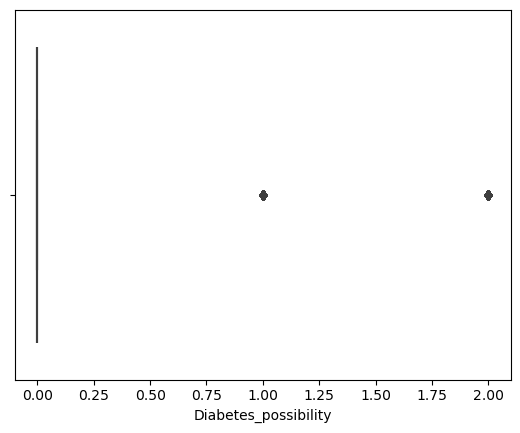

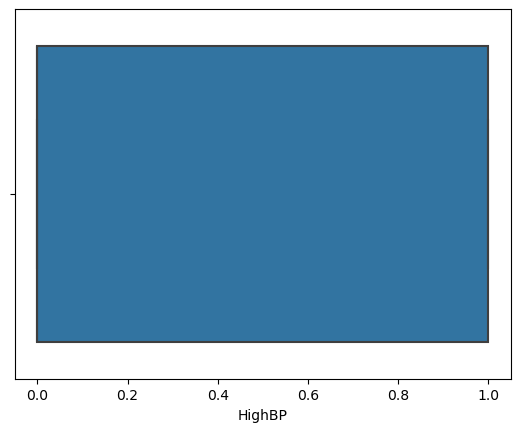

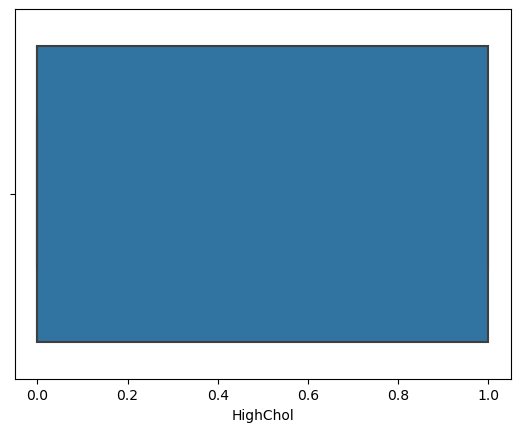

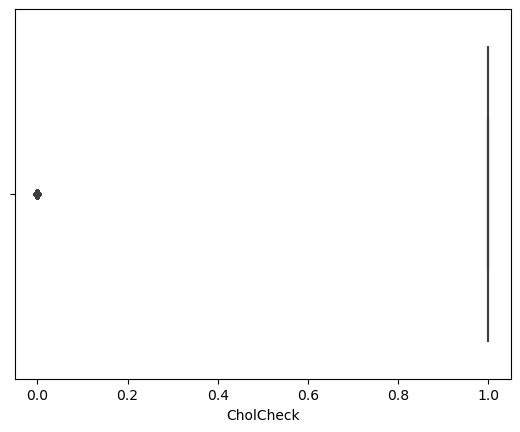

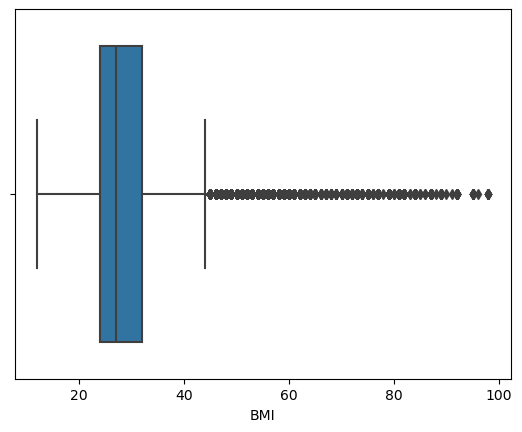

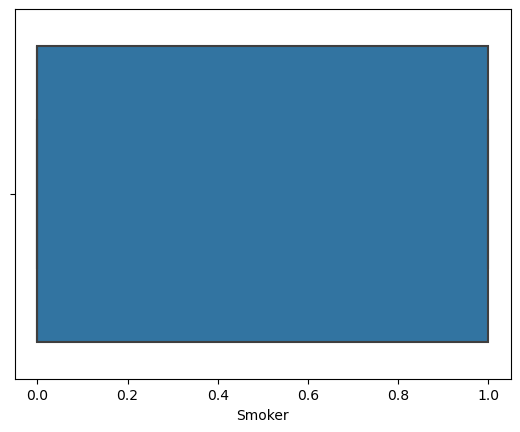

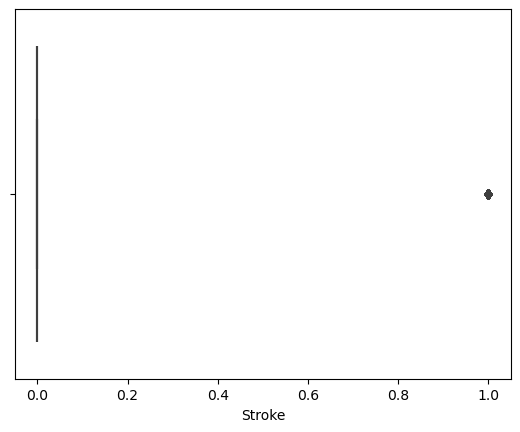

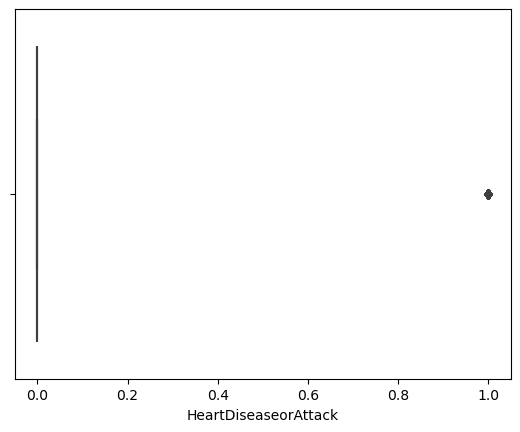

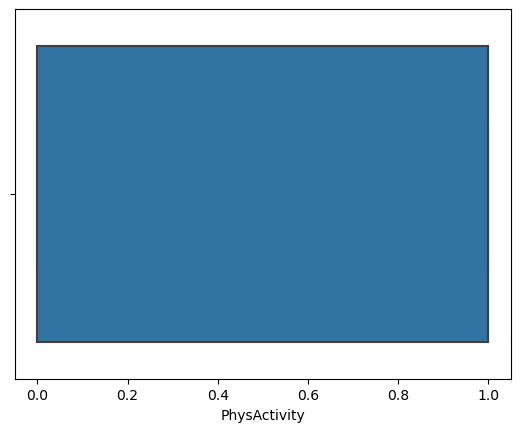

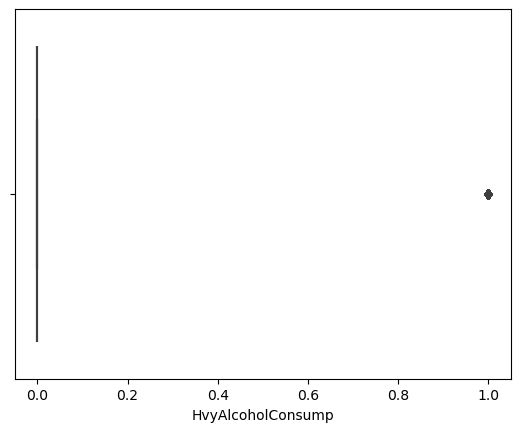

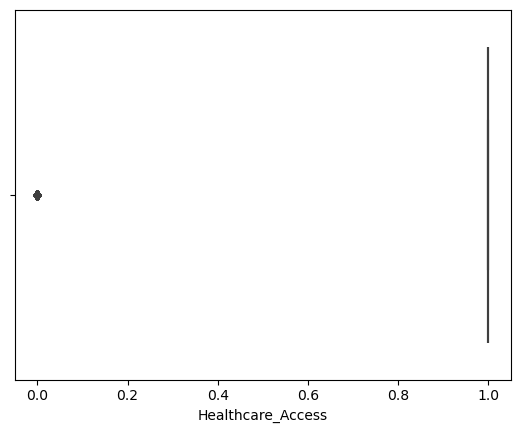

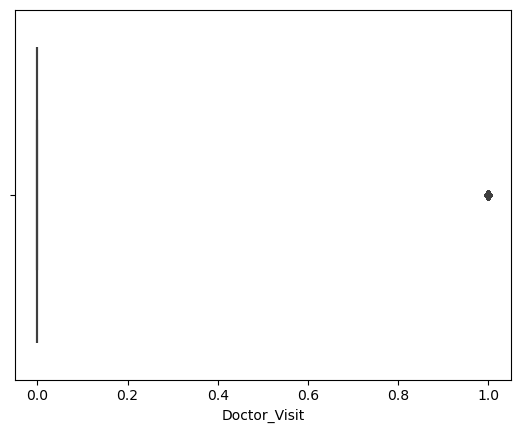

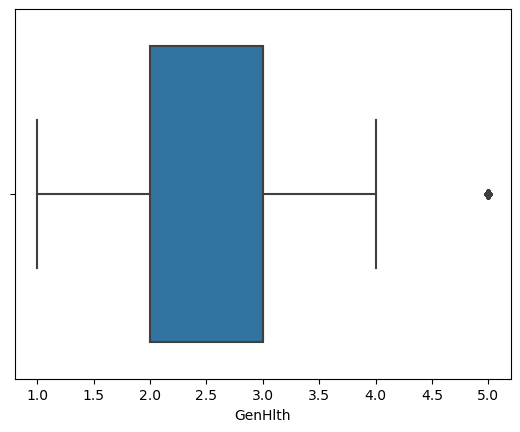

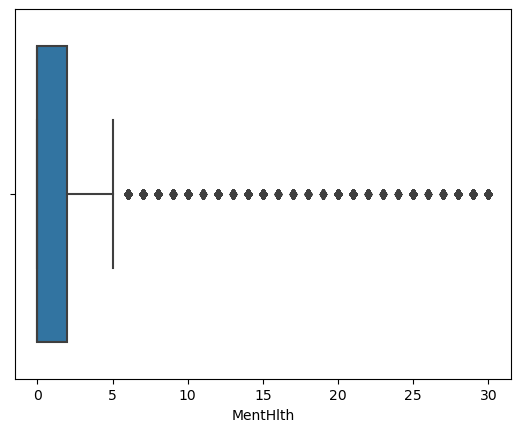

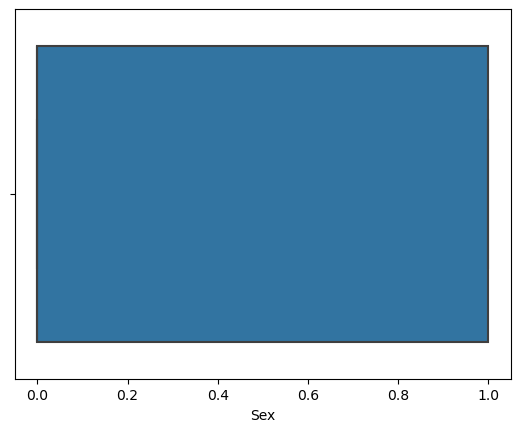

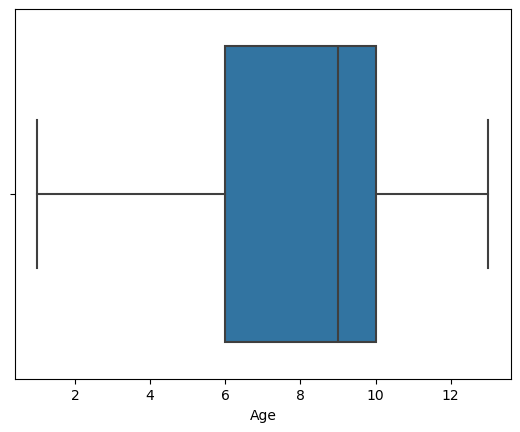

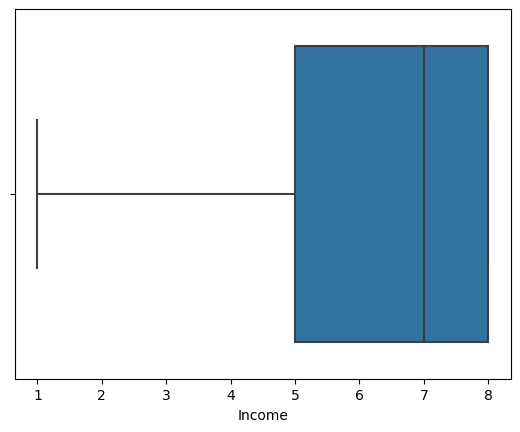

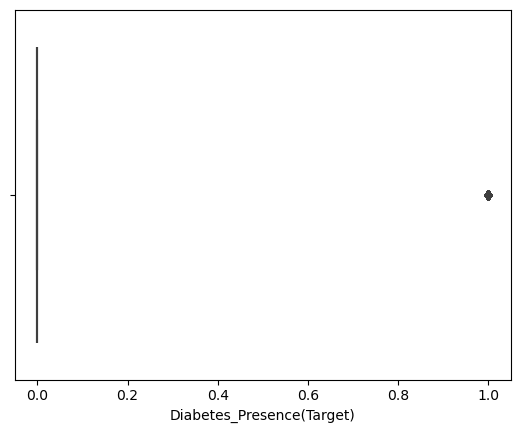

In [57]:
# Box plots for numerical variables
for column in data.select_dtypes(include=['number']):
    sns.boxplot(x=column, data=data)
    plt.show()


### Before

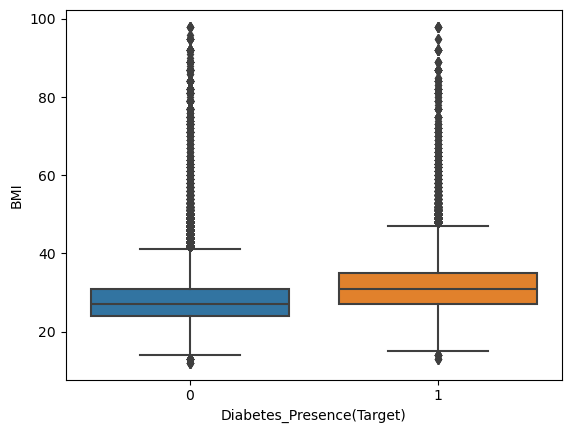

In [59]:
# Before
sns.boxplot(x='Diabetes_Presence(Target)', y='BMI', data=data)
plt.show()

In [60]:
# Using IQR for outlier detection
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from 'BMI'
data = remove_outliers_iqr(data, 'BMI')

### After

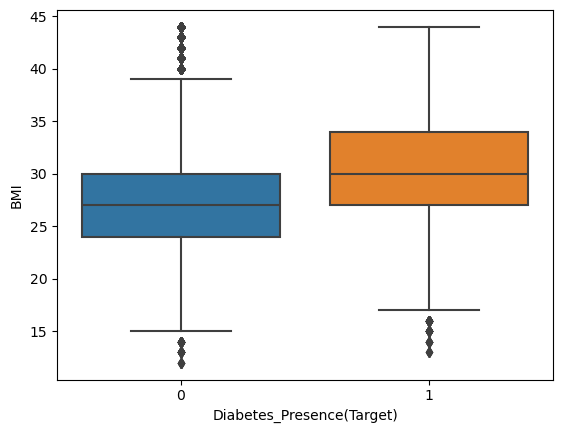

In [62]:
# After
sns.boxplot(x='Diabetes_Presence(Target)', y='BMI', data=data)
plt.show()

In [63]:
data

,Diabetes_possibility,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,Healthcare_Access,Doctor_Visit,GenHlth,MentHlth,Sex,Age,Income,Diabetes_Presence(Target)
0,0,1,0,1,26,0,0,0,1,0,1,0,3,5,1,4,8,0
1,0,1,1,1,26,1,1,0,0,0,1,0,3,0,1,12,8,0
2,0,0,0,1,26,0,0,0,1,0,1,0,1,0,1,13,8,0
3,0,1,1,1,28,1,0,0,1,0,1,0,3,0,1,11,8,0
4,0,0,0,1,29,1,0,0,1,0,1,0,2,0,0,8,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,0,1,0,1,21,0,0,0,1,0,1,0,2,0,0,9,6,0
249996,0,0,1,1,29,0,0,0,1,0,1,0,5,0,0,10,1,0
249997,0,1,0,1,28,1,0,1,1,0,1,0,2,2,0,9,8,0
249998,0,1,1,1,32,0,0,0,0,0,1,0,3,0,1,8,7,1


# 6. MODEL BUILD

In [65]:
data.duplicated().sum()

79745

In [66]:
data = data.drop_duplicates()

In [67]:
data.duplicated().sum()

0

In [68]:
x = data.drop('Diabetes_Presence(Target)',axis=1)
x

,Diabetes_possibility,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,Healthcare_Access,Doctor_Visit,GenHlth,MentHlth,Sex,Age,Income
0,0,1,0,1,26,0,0,0,1,0,1,0,3,5,1,4,8
1,0,1,1,1,26,1,1,0,0,0,1,0,3,0,1,12,8
2,0,0,0,1,26,0,0,0,1,0,1,0,1,0,1,13,8
3,0,1,1,1,28,1,0,0,1,0,1,0,3,0,1,11,8
4,0,0,0,1,29,1,0,0,1,0,1,0,2,0,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249991,2,0,1,1,30,1,0,0,1,0,1,0,2,0,0,9,8
249994,0,1,1,1,29,1,0,0,0,0,1,0,4,5,1,10,3
249995,0,1,0,1,21,0,0,0,1,0,1,0,2,0,0,9,6
249996,0,0,1,1,29,0,0,0,1,0,1,0,5,0,0,10,1


In [69]:
y = data['Diabetes_Presence(Target)']
y

0         0
1         0
2         0
3         0
4         0
         ..
249991    0
249994    0
249995    0
249996    0
249997    0
Name: Diabetes_Presence(Target), Length: 163586, dtype: int64

In [70]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [71]:
x_train

,Diabetes_possibility,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,Healthcare_Access,Doctor_Visit,GenHlth,MentHlth,Sex,Age,Income
217751,0,0,0,1,23,0,0,0,1,0,1,0,3,2,1,1,8
208922,0,1,1,1,23,0,0,1,1,0,1,0,5,0,0,12,6
201028,0,0,1,1,33,1,0,0,1,0,1,0,1,30,0,6,6
132452,0,1,0,1,27,1,0,0,1,0,1,0,2,0,0,9,7
146895,0,0,1,1,29,1,0,0,1,1,1,0,2,0,1,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128317,2,0,0,1,33,1,0,0,1,0,1,0,2,0,0,8,8
125520,0,0,1,1,32,0,0,0,1,0,1,0,2,0,0,7,7
228474,0,1,1,1,22,0,0,0,0,0,1,0,2,0,0,13,5
164624,0,0,1,1,30,0,0,0,1,0,1,0,1,0,0,11,8


In [72]:
y_train

217751    0
208922    0
201028    0
132452    0
146895    0
         ..
128317    0
125520    0
228474    0
164624    0
49338     1
Name: Diabetes_Presence(Target), Length: 130868, dtype: int64

In [73]:

def train_models_eval(x_train,y_train,fts):
    print("\n---›RANDOM FOREST" )
    rf = RandomForestClassifier(random_state=1234)
    rf.fit(x_train[fts], y_train)
    y_pred=rf.predict(x_test[fts])
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print("SCORE:",rf.score(x_test[fts],y_test))
    
    print("\n---›DECISION TREE")
    dtf = DecisionTreeClassifier(random_state=1234)
    dtf.fit(x_train[fts], y_train)
    y_pred=dtf.predict(x_test[fts])
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print("SCORE:",dtf.score(x_test[fts],y_test))
    
    print(" \n--->KNN")
    knn = KNeighborsClassifier()
    knn.fit(x_train[fts], y_train)
    y_pred=knn.predict(x_test[fts])
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print("SCORE:",knn.score(x_test[fts],y_test))
    
    print("\n---›EXTRAS TREES CLASSIFIER")
    etc = ExtraTreesClassifier(random_state=1234)
    etc.fit(x_train[fts],y_train)
    y_pred=etc.predict(x_test[fts])
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print("SCORE:",etc.score(x_test[fts],y_test))
    
    print("\n---›XGBOOST" )
    xgb = xgboost.XGBClassifier ()
    xgb.fit(x_train[fts], y_train)
    y_pred=xgb.predict(x_test[fts])
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    print("SCORE:", xgb.score(x_test[fts],y_test))
    
    return rf,dtf,knn,etc,xgb

In [74]:
fts = data.drop('Diabetes_Presence(Target)',axis=1).columns
rf,dtf,knn,etc,xgb = train_models_eval(x_train,y_train,fts)


---›RANDOM FOREST
[[22486  2867]
 [ 4885  2480]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     25353
           1       0.46      0.34      0.39      7365

    accuracy                           0.76     32718
   macro avg       0.64      0.61      0.62     32718
weighted avg       0.74      0.76      0.75     32718

SCORE: 0.7630662020905923

---›DECISION TREE
[[20367  4986]
 [ 4412  2953]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81     25353
           1       0.37      0.40      0.39      7365

    accuracy                           0.71     32718
   macro avg       0.60      0.60      0.60     32718
weighted avg       0.72      0.71      0.72     32718

SCORE: 0.7127575035148848
 
--->KNN
[[22509  2844]
 [ 5024  2341]]
              precision    recall  f1-score   support

           0       0.82      0.89      0.85     25353
           1       0.45      0.32      0.37 

## SMOTE

In [76]:
print(y_train.value_counts())

Diabetes_Presence(Target)
0    100938
1     29930
Name: count, dtype: int64


In [77]:
smote=SMOTE()

In [78]:
x_res_train,y_res_train = smote.fit_resample(x_train,y_train)

In [79]:
x_res_train

,Diabetes_possibility,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,HvyAlcoholConsump,Healthcare_Access,Doctor_Visit,GenHlth,MentHlth,Sex,Age,Income
0,0,0,0,1,23,0,0,0,1,0,1,0,3,2,1,1,8
1,0,1,1,1,23,0,0,1,1,0,1,0,5,0,0,12,6
2,0,0,1,1,33,1,0,0,1,0,1,0,1,30,0,6,6
3,0,1,0,1,27,1,0,0,1,0,1,0,2,0,0,9,7
4,0,0,1,1,29,1,0,0,1,1,1,0,2,0,1,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201871,2,1,1,1,26,0,0,0,0,0,1,0,4,0,0,9,8
201872,2,0,1,1,35,0,0,0,1,0,1,0,2,0,1,10,6
201873,0,1,1,1,38,1,0,0,0,0,1,0,3,10,0,7,4
201874,2,0,1,1,28,0,0,0,1,0,1,0,2,0,0,10,7


In [80]:
y_res_train

0         0
1         0
2         0
3         0
4         0
         ..
201871    1
201872    1
201873    1
201874    1
201875    1
Name: Diabetes_Presence(Target), Length: 201876, dtype: int64

In [81]:
rf,dtf,knn,etc,xgb = train_models_eval(x_res_train,y_res_train,fts)


---›RANDOM FOREST
[[19493  5860]
 [ 3369  3996]]
              precision    recall  f1-score   support

           0       0.85      0.77      0.81     25353
           1       0.41      0.54      0.46      7365

    accuracy                           0.72     32718
   macro avg       0.63      0.66      0.64     32718
weighted avg       0.75      0.72      0.73     32718

SCORE: 0.7179228559202885

---›DECISION TREE
[[18346  7007]
 [ 3844  3521]]
              precision    recall  f1-score   support

           0       0.83      0.72      0.77     25353
           1       0.33      0.48      0.39      7365

    accuracy                           0.67     32718
   macro avg       0.58      0.60      0.58     32718
weighted avg       0.72      0.67      0.69     32718

SCORE: 0.6683476985145791
 
--->KNN
[[16085  9268]
 [ 2404  4961]]
              precision    recall  f1-score   support

           0       0.87      0.63      0.73     25353
           1       0.35      0.67      0.46 